In [3]:
# Reading external data and plotting
# Reading CSV file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = False, date_parser=None, dayf

In [10]:
df = pd.read_csv('btc-market-price.csv')
df

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250
...,...,...
359,2018-03-28 00:00:00,7960.380000
360,2018-03-29 00:00:00,7172.280000
361,2018-03-30 00:00:00,6882.531667
362,2018-03-31 00:00:00,6935.480000


In [11]:
df = pd.read_csv('btc-market-price.csv', header=None)
df

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [12]:
# let's change the column
df.columns = ['Timestamp', 'Price']
df

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [14]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [16]:
df.tail()

,Timestamp,Price
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [18]:
# the timestamp was passed as string which is not 
# suppose to be so, we need to change it back to date and time, 
# which is part of data cleaning. we will use .to_datetime() function

pd.to_datetime(df['Timestamp'].head())
               

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [19]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'].head())

In [20]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [23]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [ ]:
 # setting the timestamp as the index on the dataframe
df.set_index('Timestamp', inplace=True)

In [29]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [34]:
# using .loc to get value from a row
df.loc['2017-04-02']


Price    1099.169125
Name: 2017-04-02 00:00:00, dtype: float64

In [31]:
# Putting everything together
# for the final version of the DataFrame parsed from out CSV file.

df = pd.read_csv('btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [37]:
# Doing this in one steps
df = pd.read_csv(
	'btc-market-price.csv', 
	header=None,
	names = ['Timestamp', 'Price'],
	index_col=0,
	parse_dates=True
)
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


<Axes: xlabel='Timestamp'>

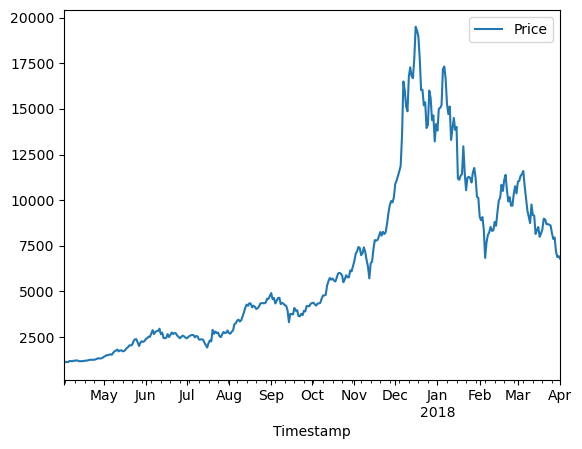

In [39]:
# Plott basics
# pandas integrates with Matplotib and creating a plot is as simple as
df.plot()

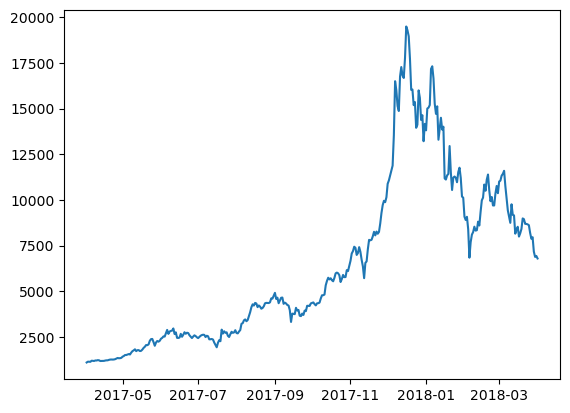

In [40]:
plt.plot(df.index, df['Price'])

In [41]:
x = np.arange(-10, 11)

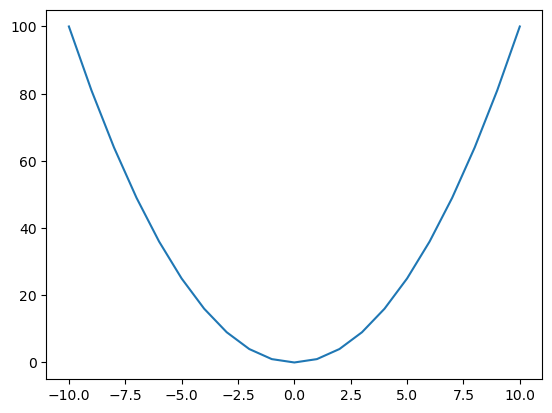

In [43]:
plt.plot(x, x ** 2)